In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("CWC23_all_innings.csv")

In [3]:
df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

In [5]:
# Handling missing values for bowlers
bowler_columns = ['4s', '6s', 'sr', 'not_out', 'mins',]
df_bowlers = df[df['bat_or_bowl'] == 'bowl']
df_bowlers[bowler_columns] = df_bowlers[bowler_columns].fillna(0)

# Handling missing values for batsmen
batsman_columns = ['wkts', 'overs', 'mdns', 'econ']
df_batsmen = df[df['bat_or_bowl'] == 'bat']
df_batsmen[batsman_columns] = df_batsmen[batsman_columns].fillna(0)

In [6]:
#concatinating

final_df=pd.concat([df_bowlers, df_batsmen])

final_df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,0.0,0.0,0.0,0.0,0.0
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,0.0,0.0,0.0,0.0,0.0
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,0.0,0.0,0.0,0.0,0.0
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,0.0,0.0,0.0,0.0,0.0
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,0.0,0.0,0.0,0.0,0.0


In [7]:
final_df.isnull().sum()

team               0
player             0
bat_or_bowl        0
bb_bf              0
runs               0
wkts               0
wicketball_prob    0
runs_per_ball      0
opposition         0
ground             0
start_date         0
overs              0
mdns               0
econ               0
inns               0
4s                 0
6s                 0
sr                 0
not_out            0
mins               0
dtype: int64

In [8]:
#task 1
#. Team Performance Analysis:
#- Explore team-wise performance metrics.
#- Analyze runs scored, wickets taken, and batting/bowling styles.
#- Identify top-performing teams and their strengths

In [9]:
# team wise performance
team_performance=final_df.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'wicketball_prob' : 'mean',
    'sr': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()

In [10]:
#top performing team based on runs scored
top_teams_runs=team_performance.nlargest(5, 'runs')

#top performing teams on wickets taken
top_teams_wickets=team_performance.nlargest(5, 'wkts')

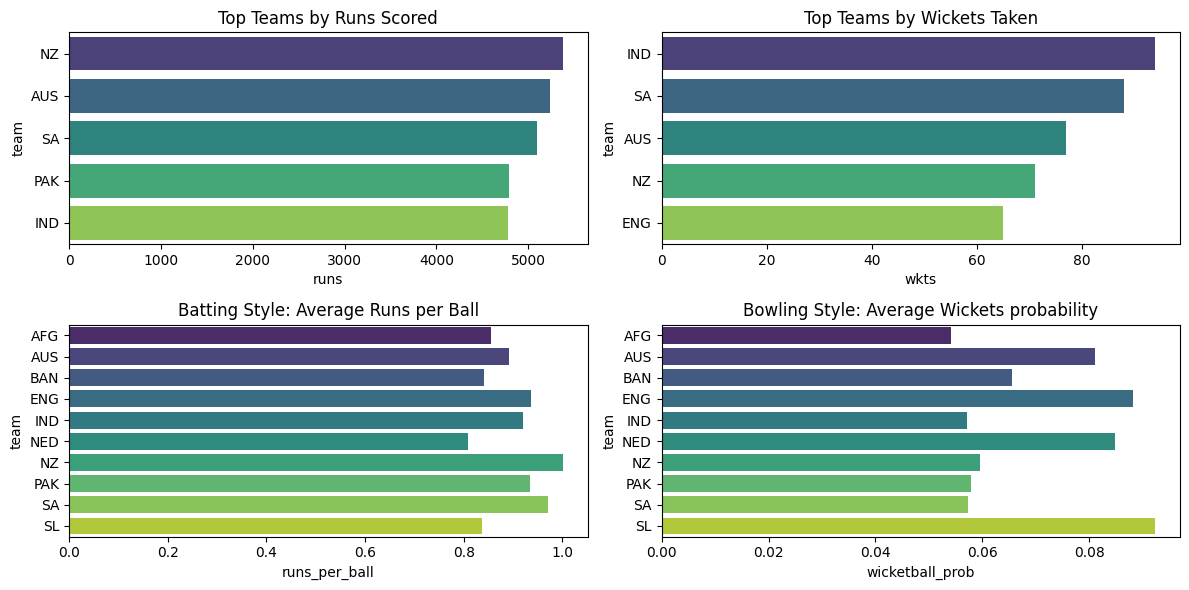

In [11]:
#plotting

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

#total runs score by each team
plt.subplot(2,2, 1)
sns.barplot(x='runs', y='team', data=top_teams_runs, palette='viridis')
plt.title('Top Teams by Runs Scored')

#total wickets by each team
plt.subplot(2,2,2)
sns.barplot(x='wkts', y='team', data=top_teams_wickets, palette='viridis')
plt.title("Top Teams by Wickets Taken")

#Average Run per Ball
plt.subplot(2,2,3)
sns.barplot(x='runs_per_ball',y='team', data=team_performance, palette='viridis')
plt.title('Batting Style: Average Runs per Ball')

#Average Wicket probability
plt.subplot(2,2,4)
sns.barplot(x='wicketball_prob', y='team', data=team_performance, palette='viridis')
plt.title('Bowling Style: Average Wickets probability')

plt.tight_layout()
plt.show()

In [12]:
#task 2
#   Player Performance Analysis:
# - Evaluate individual player statistics for both batting and bowling.
# - Identify leading run-scorers and wicket-takers.
# - Assess the impact of players on their team's performance.

In [13]:
player_perforance=final_df.groupby(['team', 'player','bat_or_bowl']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'wicketball_prob': 'mean',
    'sr': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()

In [14]:
#batsmen
batsmen=player_perforance[player_perforance['bat_or_bowl']=='bat']
#bowlers
bowlers=player_perforance[player_perforance['bat_or_bowl']=='bowl']

#leading runs scorer
leading_runs_scorer=batsmen.nlargest(5, 'runs')
leading_wickets_takers=bowlers.nlargest(5, 'wkts')

In [15]:
#impact of players on team performance
team_impact=final_df.groupby(['team', 'player']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()


#top 15 players (as I have a lot of players so plotting all doesn't seem good)
top_15=team_impact.nlargest(15, ['runs' , 'wkts'])


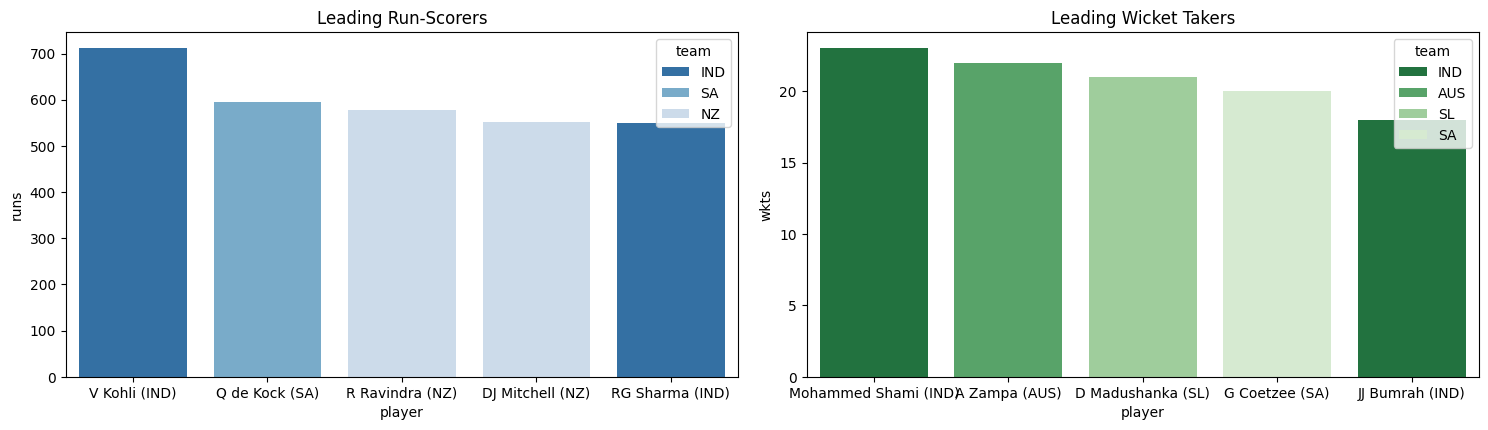

In [16]:
#plotting

plt.figure(figsize=(15, 8))

#leading runs scorers
plt.subplot(2,2,1)
sns.barplot(x='player', y='runs', data=leading_runs_scorer, hue='team', palette='Blues_r')
plt.title('Leading Run-Scorers')

#leading wicket takers
plt.subplot(2,2,2)
sns.barplot(x='player', y='wkts', data=leading_wickets_takers,hue='team', palette='Greens_r' )
plt.title('Leading Wicket Takers')

plt.tight_layout()
plt.show()

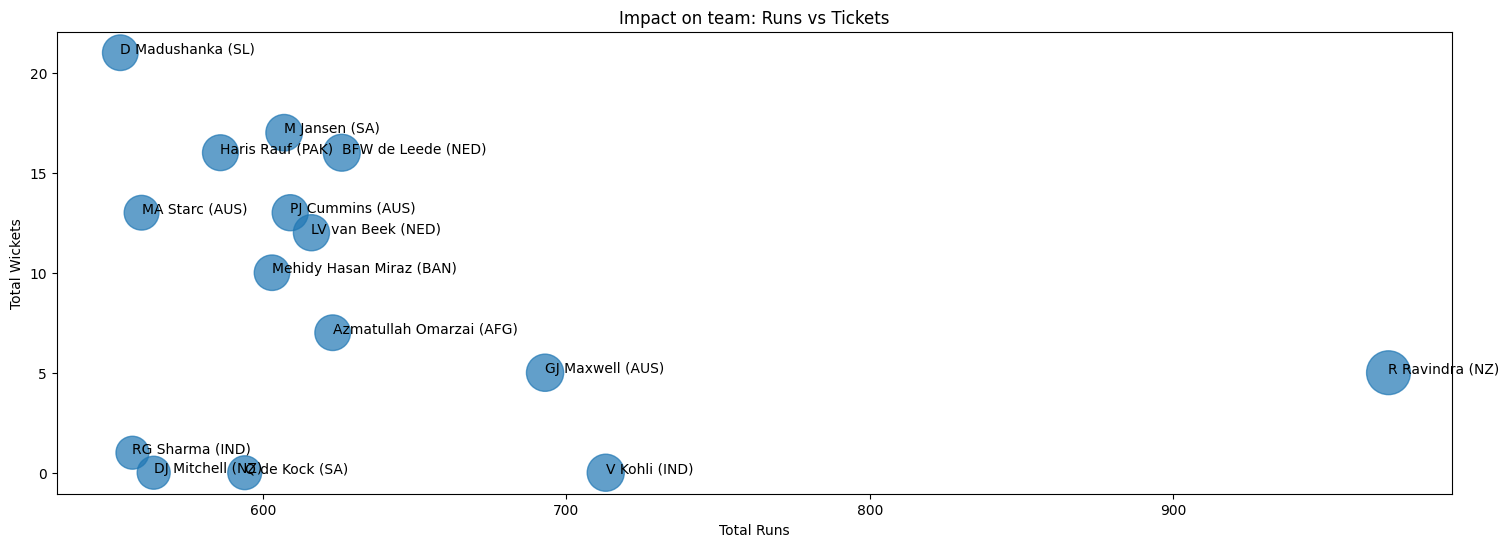

In [17]:
#bubble chart for impact (Runs Vs Wickets)

plt.figure(figsize=(18,6))
plt.scatter(x='runs', y='wkts', s=top_15['runs'] + top_15['wkts']*5,data=top_15, alpha=0.7, cmap='coolwarm' )
plt.title('Impact on team: Runs vs Tickets')
plt.xlabel('Total Runs')
plt.ylabel('Total Wickets')


#adding player labels

for i, txt in enumerate(top_15['player']):
  plt.annotate(txt, (top_15['runs'].iloc[i], top_15['wkts'].iloc[i]))

In [18]:
#task 3
# 3. Opposition and Ground Analysis:
# - Investigate how teams and players perform against different oppositions.
# - Examine performance variations across different playing grounds.
# - Identify if there are specific teams or players that excel in certain conditions.

In [19]:
#opposition wise performanace

opposition_performance=final_df.groupby(['team', 'opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'wicketball_prob': 'mean',
    'sr': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()


In [20]:
#ground wise performance

ground_performance=final_df.groupby(['team', 'ground']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'wicketball_prob': 'mean',
    'sr': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()

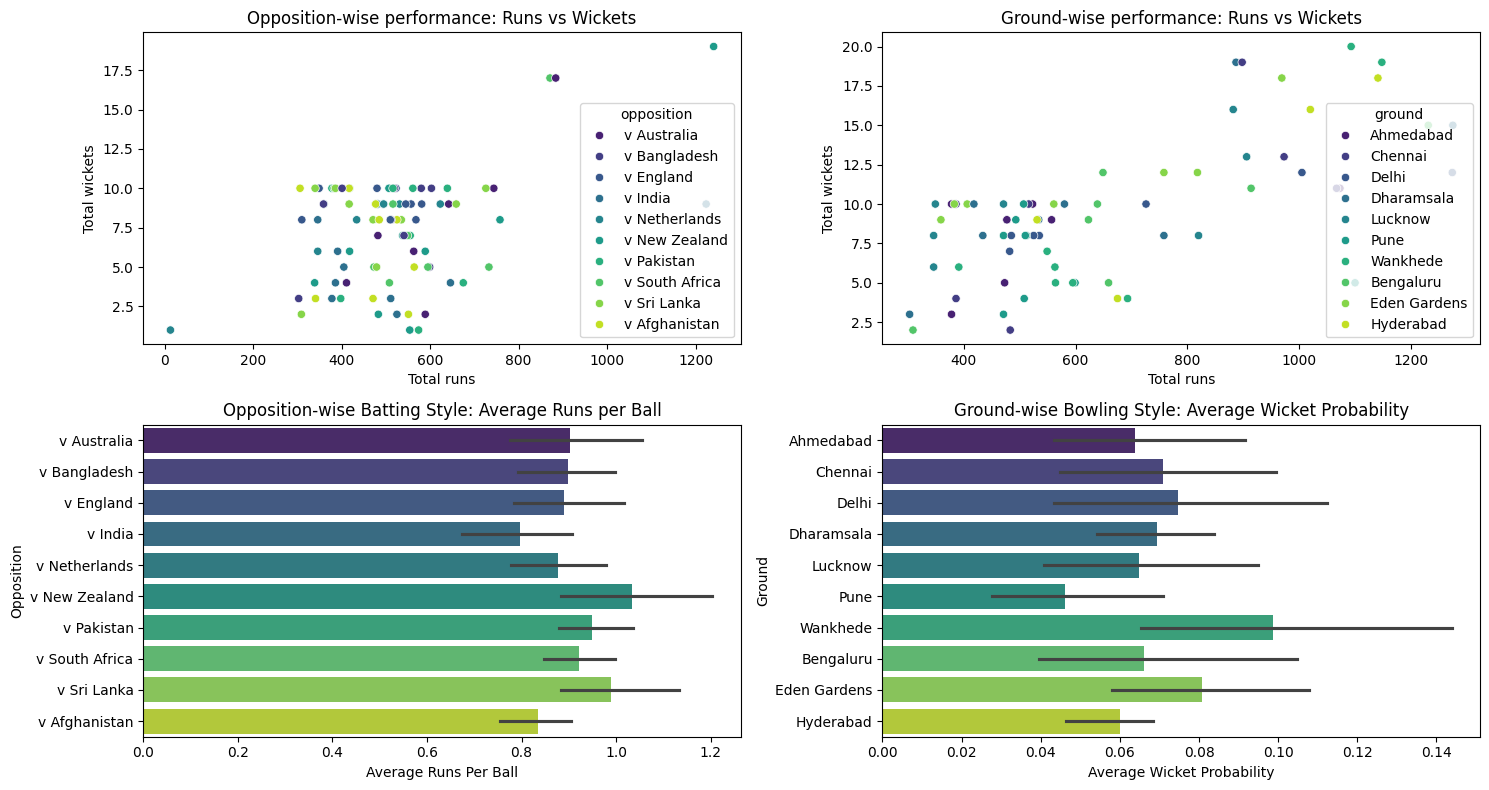

In [21]:
#plotting

plt.figure(figsize=(15,8))

#opposition wise performanace
plt.subplot(2,2,1)
sns.scatterplot(x='runs', y='wkts', data=opposition_performance,hue= 'opposition', palette='viridis')
plt.title('Opposition-wise performance: Runs vs Wickets')
plt.xlabel('Total runs')
plt.ylabel('Total wickets')

#ground-wise performance
plt.subplot(2,2,2)
sns.scatterplot(x='runs', y='wkts', data=ground_performance,hue= 'ground', palette='viridis')
plt.title('Ground-wise performance: Runs vs Wickets')
plt.xlabel('Total runs')
plt.ylabel('Total wickets')

#opposition-wise Batting Style
plt.subplot(2,2,3)
sns.barplot(x='runs_per_ball', y='opposition', data=opposition_performance, palette='viridis')
plt.title('Opposition-wise Batting Style: Average Runs per Ball')
plt.xlabel('Average Runs Per Ball')
plt.ylabel('Opposition')


#Ground-wise Batting Style
plt.subplot(2,2,4)
sns.barplot(x='wicketball_prob', y='ground', data=ground_performance, palette='viridis')
plt.title('Ground-wise Bowling Style: Average Wicket Probability')
plt.xlabel('Average Wicket Probability')
plt.ylabel('Ground')

plt.tight_layout()
plt.show()

In [22]:
#task 4
# 4. Temporal Analysis:
# - Study performance trends over time, considering start dates and overs played.
# - Identify any temporal patterns or changes in team and player performance

In [23]:
#formatting date

final_df['start_date']=pd.to_datetime(final_df['start_date'], format='%d-%b-%y')

final_df['start_date']=final_df['start_date'].dt.strftime('%m/%d/%Y')

In [24]:
final_df['start_date']

0       10/27/2023
1       10/29/2023
2       10/05/2023
3       10/13/2023
4       10/23/2023
           ...    
1380    11/16/2023
1381    11/15/2023
1382    11/16/2023
1383    11/16/2023
1384    11/16/2023
Name: start_date, Length: 1408, dtype: object

In [25]:
#Temporal Analysis

#team-wise performance

team_temporal_performance=final_df.groupby(['team', 'start_date']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'wicketball_prob': 'mean',
    'sr': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
  }).reset_index()

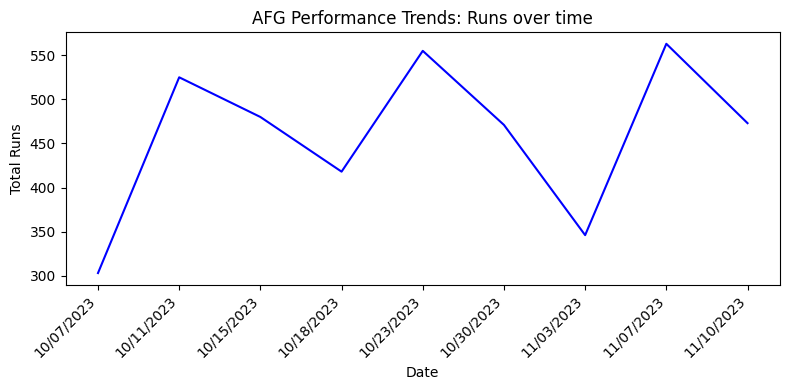

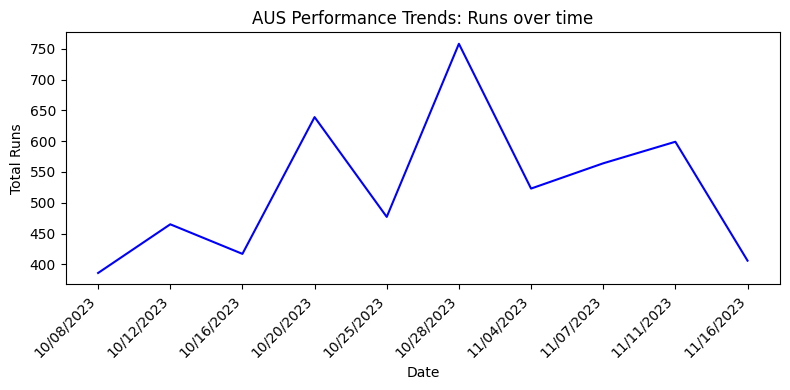

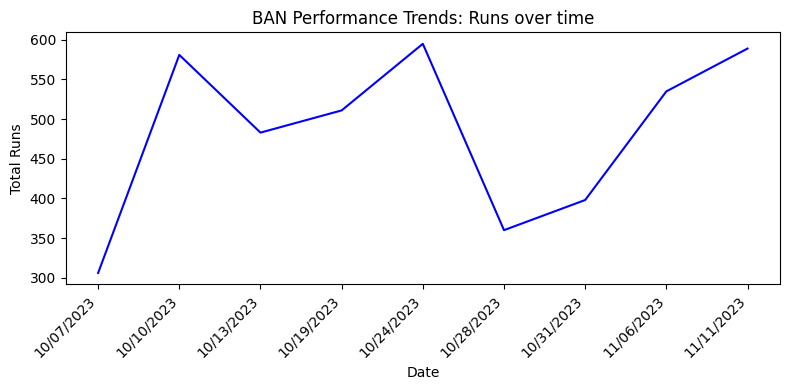

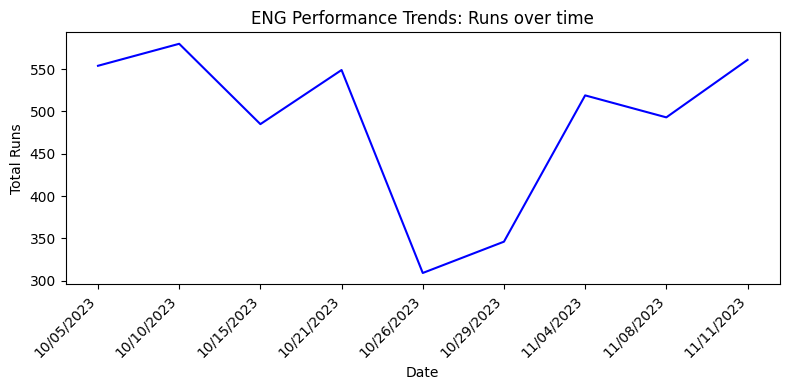

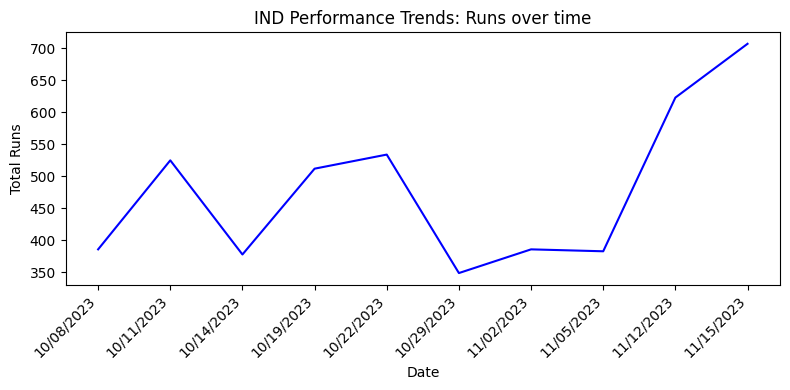

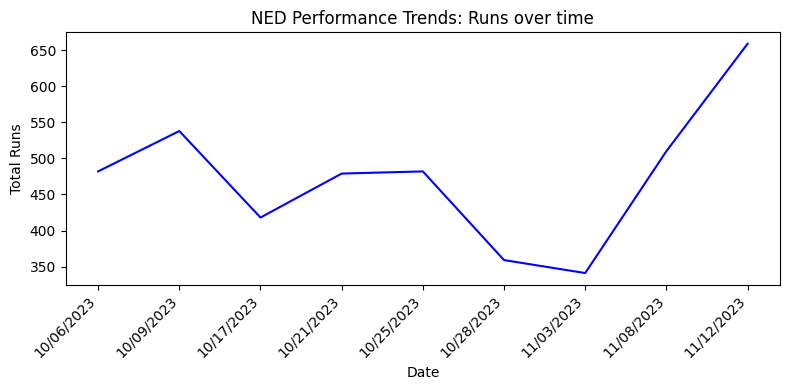

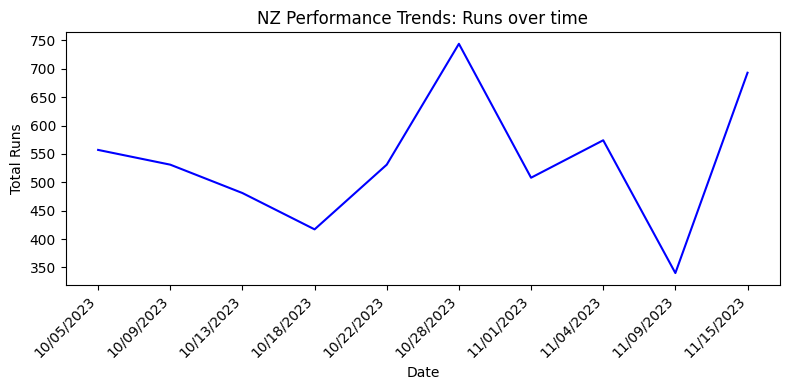

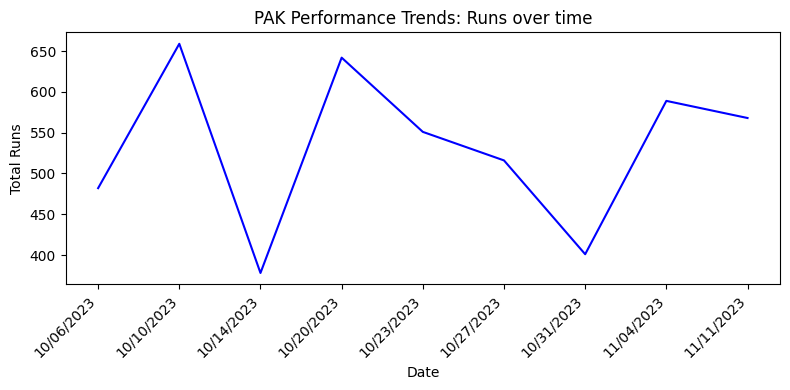

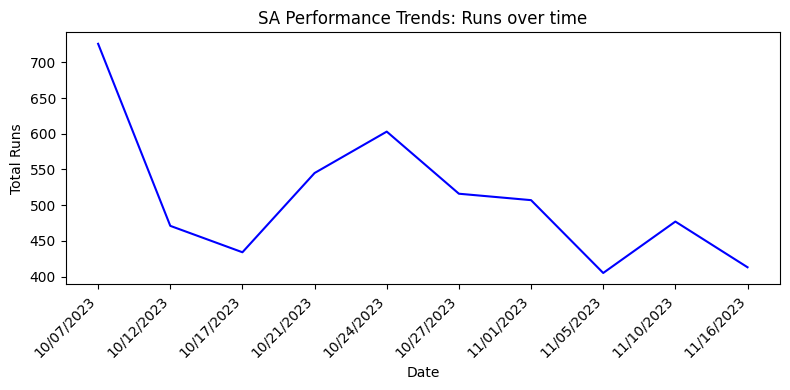

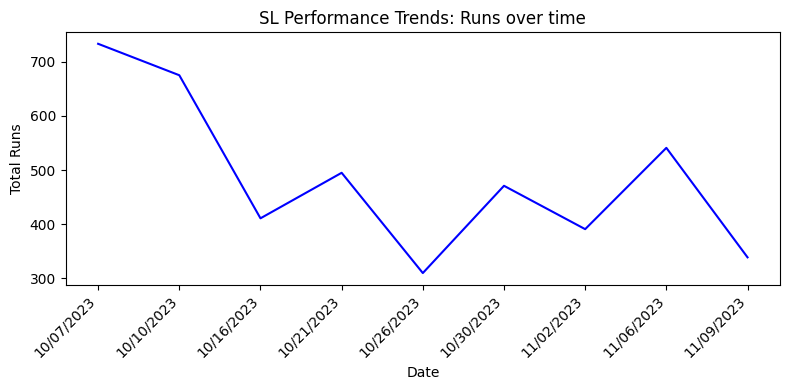

In [33]:
#team-wise performance: Runs over time

# Get unique team names
unique_teams = team_temporal_performance['team'].unique()

# Plot performance trends for each team
for team_name in unique_teams:
    # Filter the DataFrame for the current team
    team_temporal_performance_single = team_temporal_performance[team_temporal_performance['team'] == team_name]

    # Plot the performance of the current team over time
    plt.figure(figsize=(8, 4))
    sns.lineplot(x='start_date', y='runs', data=team_temporal_performance_single, color='blue')
    plt.title(f'{team_name} Performance Trends: Runs over time')
    plt.xlabel('Date')
    plt.ylabel('Total Runs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

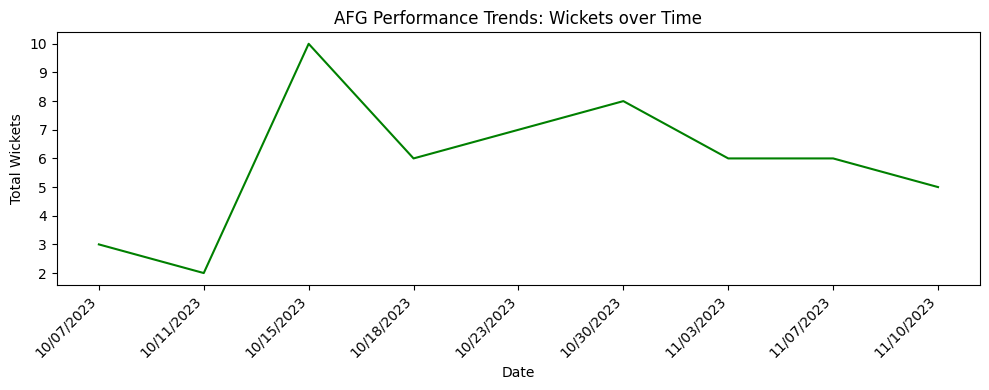

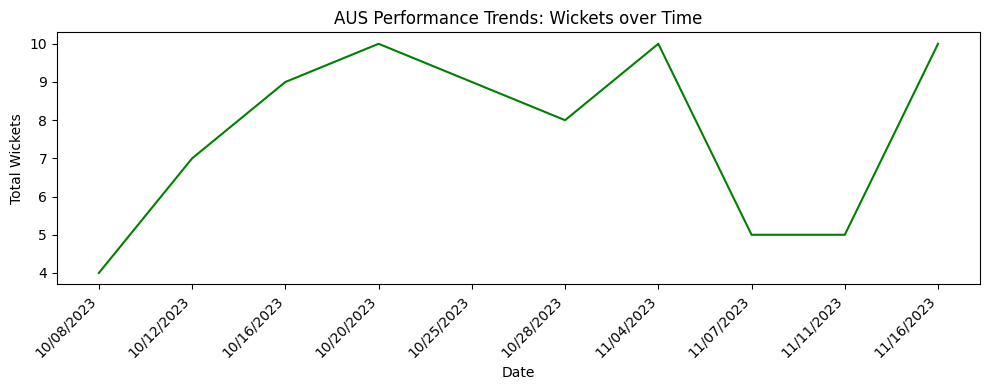

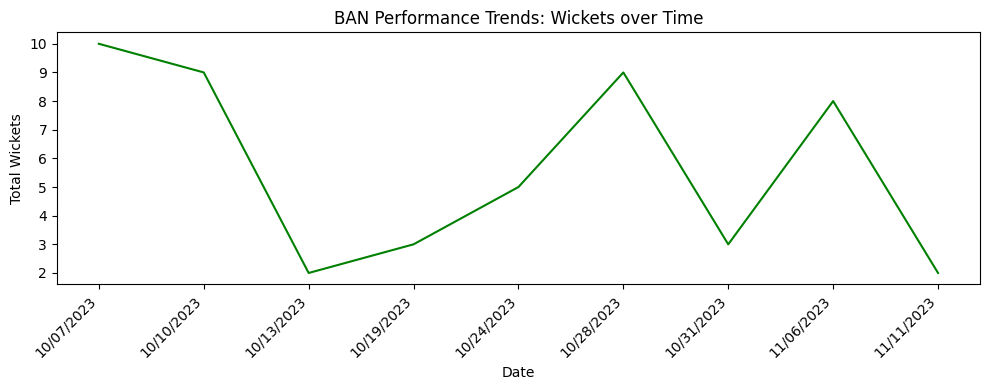

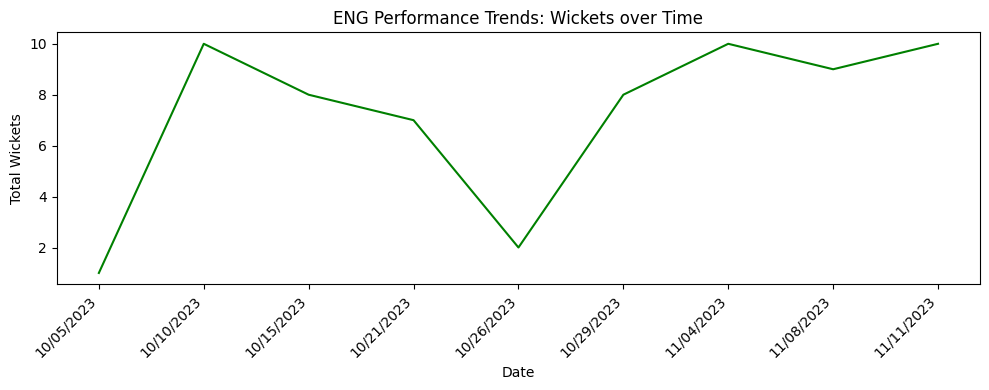

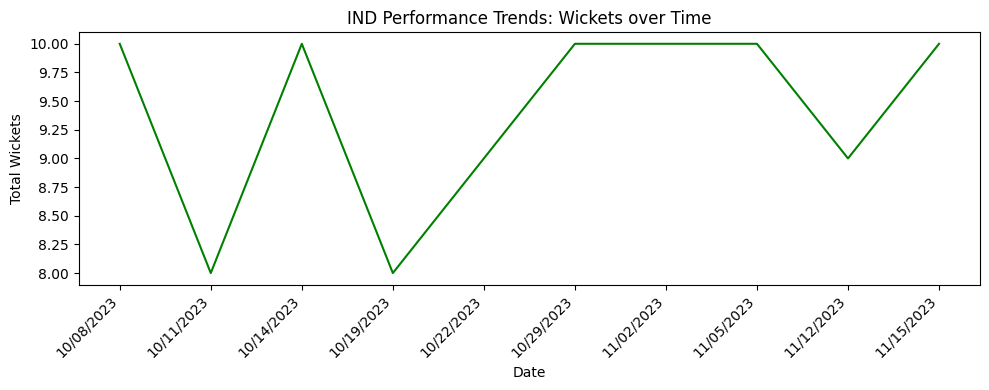

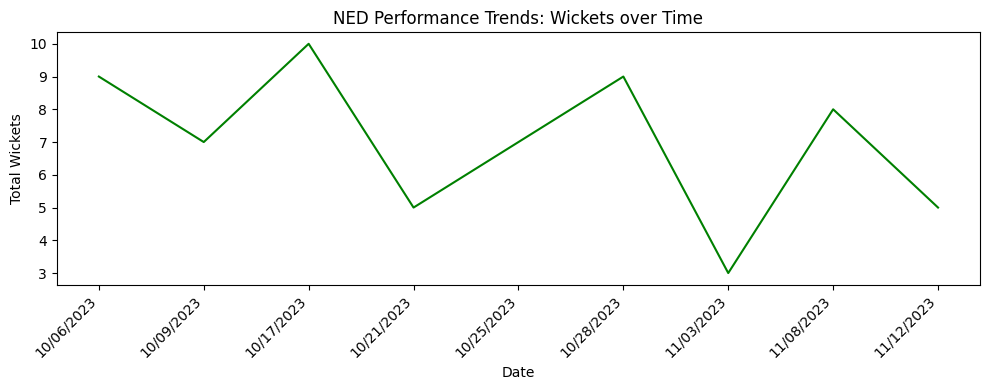

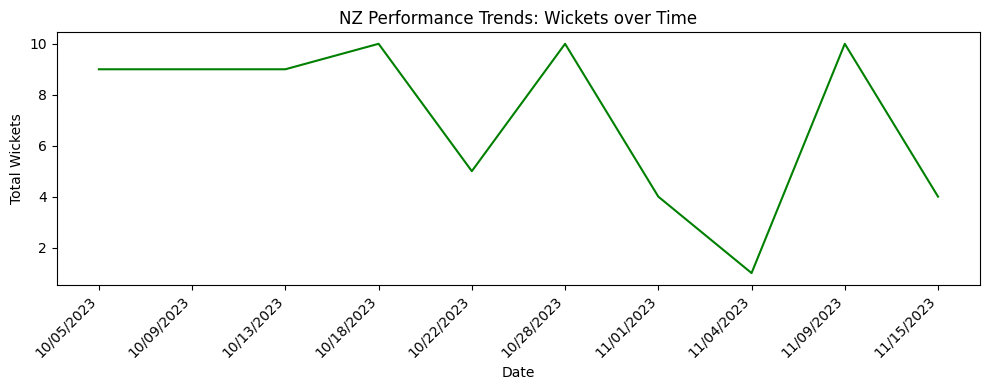

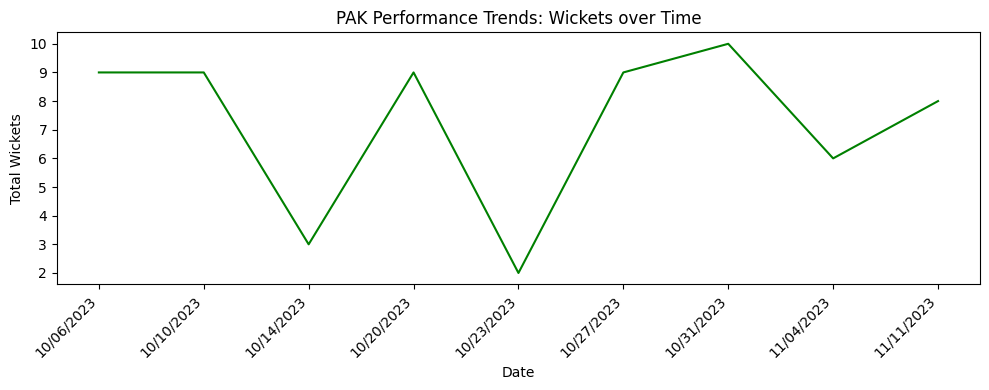

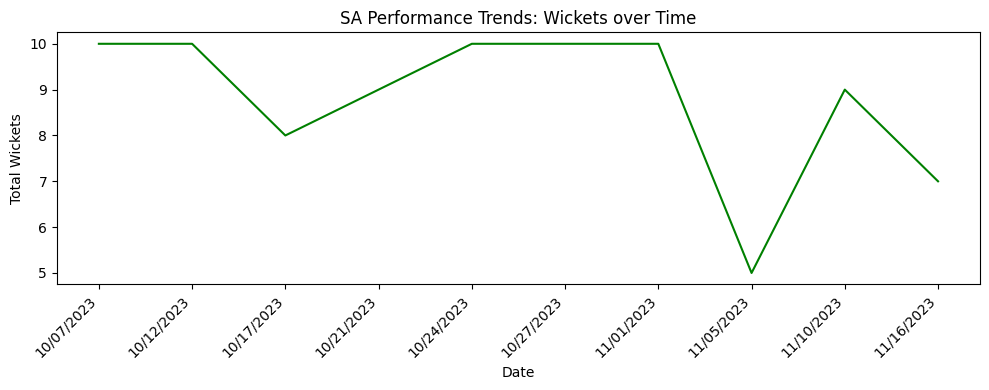

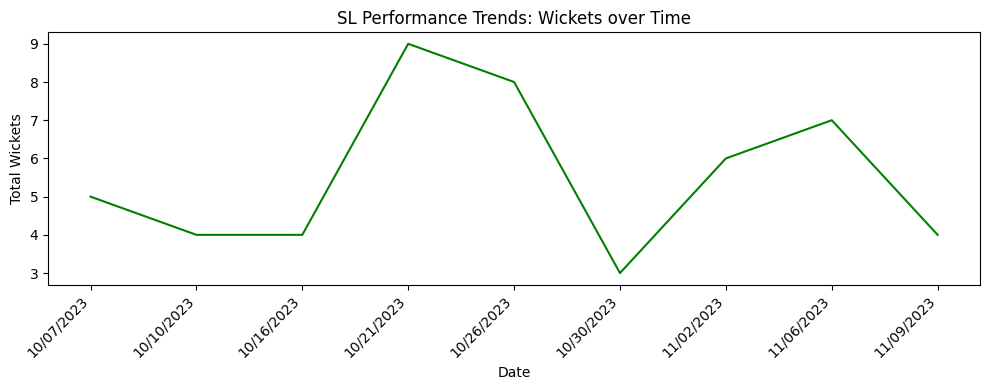

In [34]:
# Team-wise Performance Trends: Wickets over Time

# Get unique team names
unique_teams = team_temporal_performance['team'].unique()

# Plot performance trends for wickets over time for each team
for team_name in unique_teams:
    # Filter the DataFrame for the current team
    team_temporal_performance_single = team_temporal_performance[team_temporal_performance['team'] == team_name]

    # Plot the performance of the current team in terms of wickets over time
    plt.figure(figsize=(10, 4))
    sns.lineplot(x='start_date', y='wkts', data=team_temporal_performance_single, color='green')
    plt.title(f'{team_name} Performance Trends: Wickets over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Wickets')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


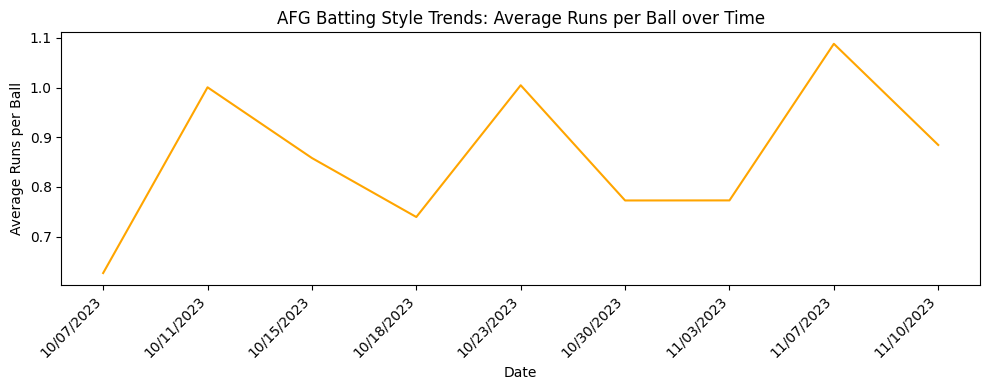

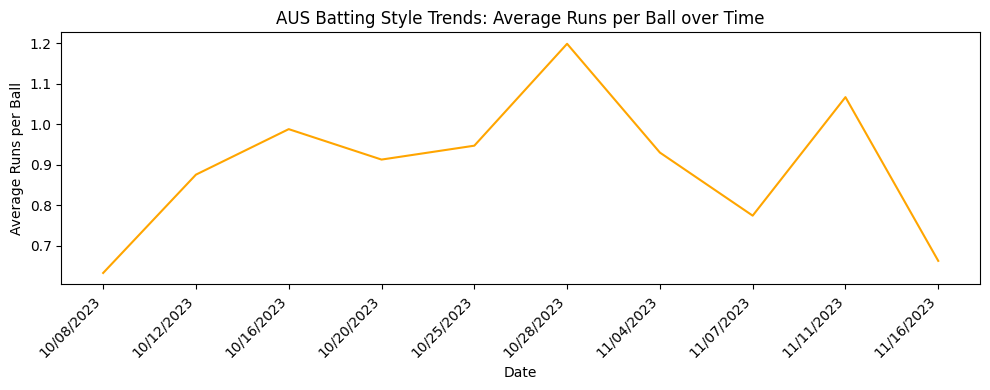

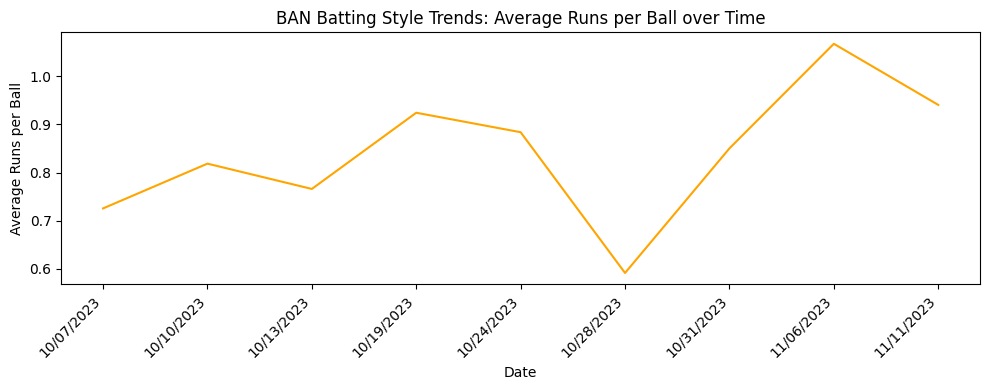

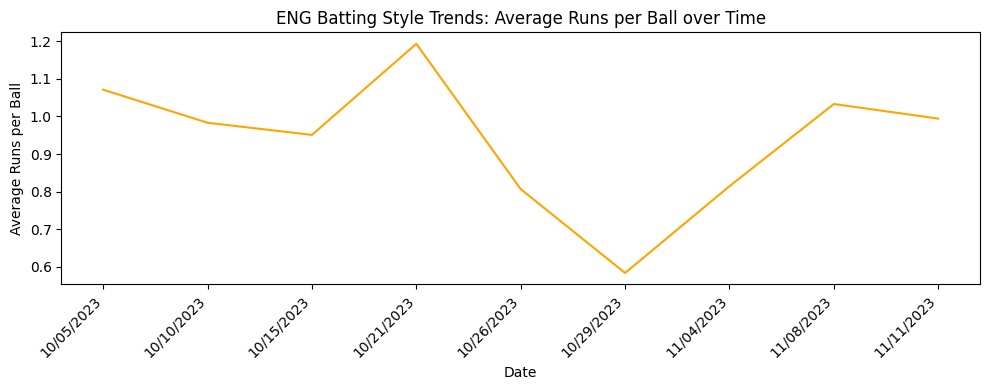

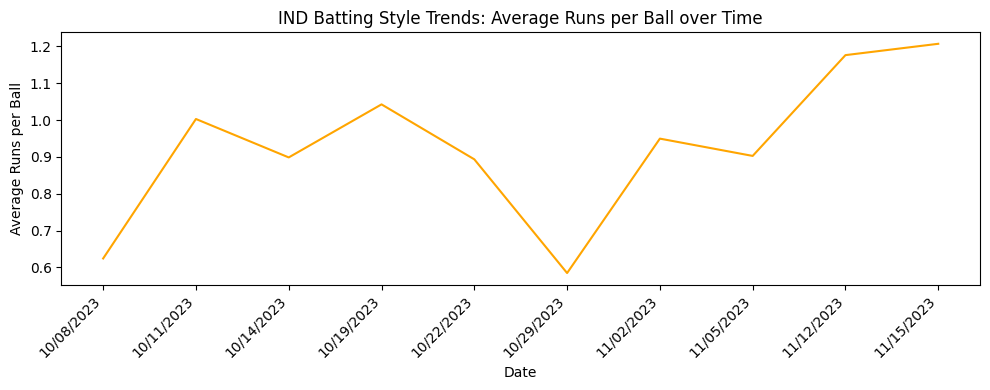

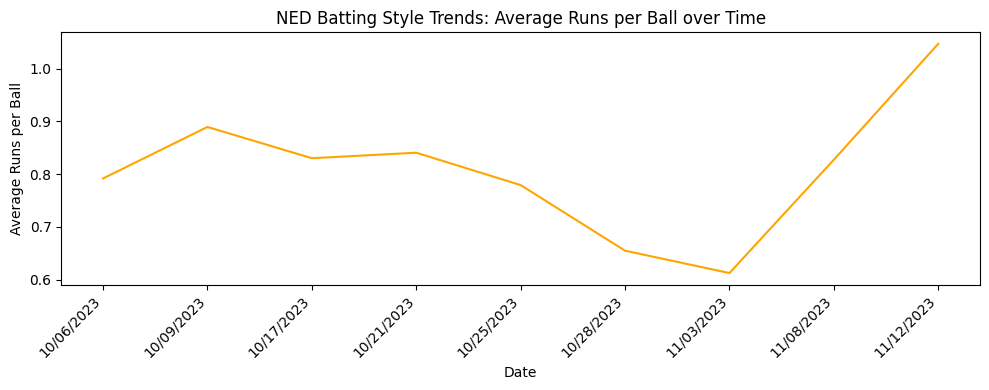

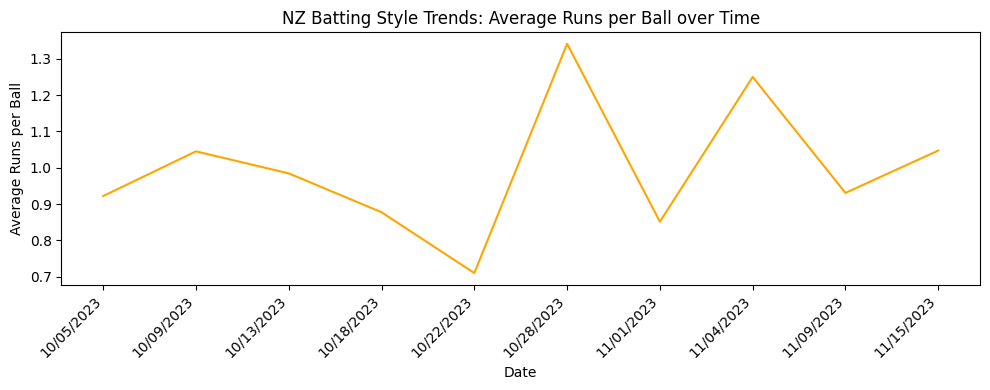

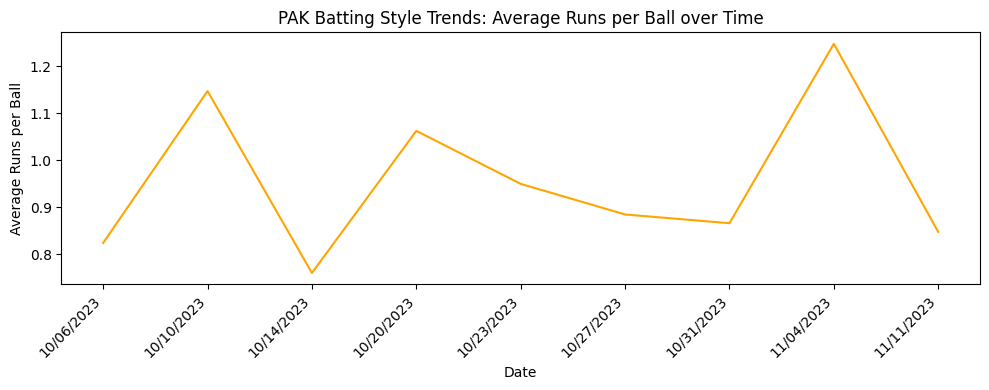

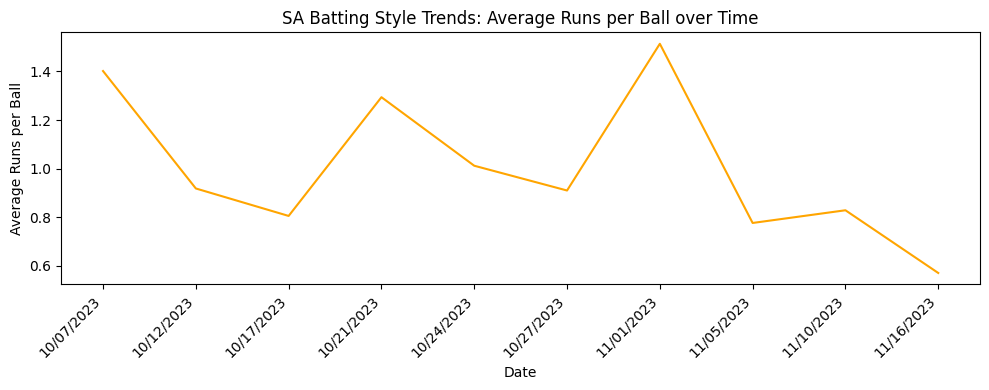

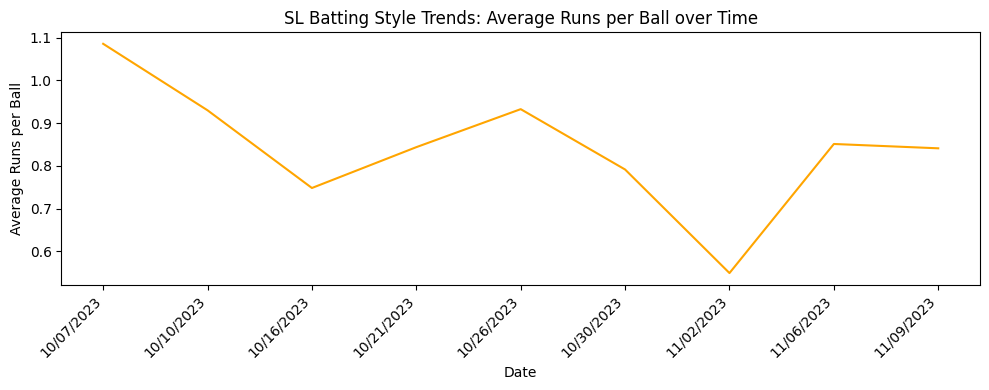

In [35]:
# Team-wise Batting Style Trends: Average Runs per Ball over Time


# Get unique team names
unique_teams = team_temporal_performance['team'].unique()

# Plot batting style trends for average runs per ball over time for each team
for team_name in unique_teams:
    # Filter the DataFrame for the current team
    team_temporal_performance_single = team_temporal_performance[team_temporal_performance['team'] == team_name]

    # Plot the batting style trend of the current team in terms of average runs per ball over time
    plt.figure(figsize=(10, 4))
    sns.lineplot(x='start_date', y='runs_per_ball', data=team_temporal_performance_single, color='orange')
    plt.title(f'{team_name} Batting Style Trends: Average Runs per Ball over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Runs per Ball')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

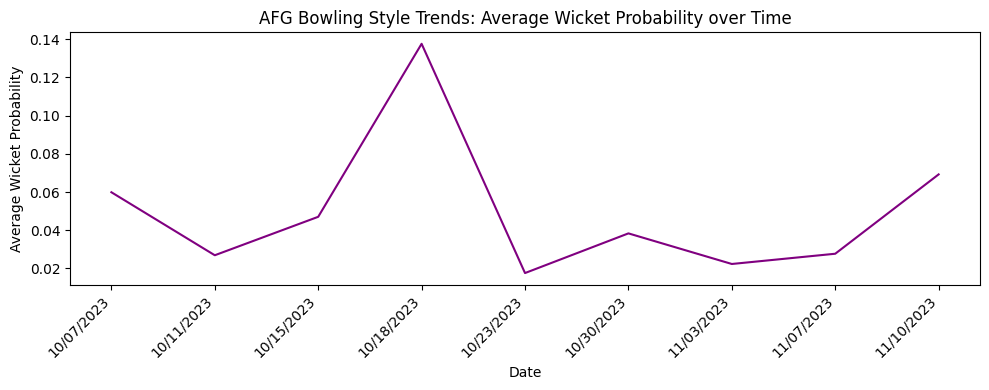

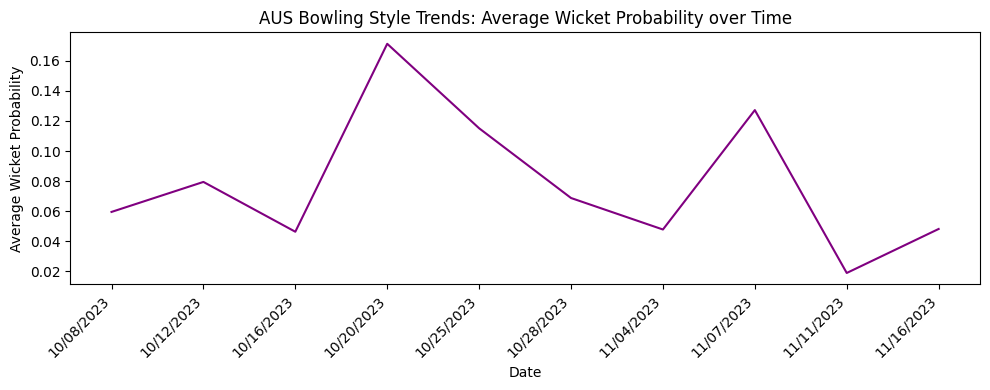

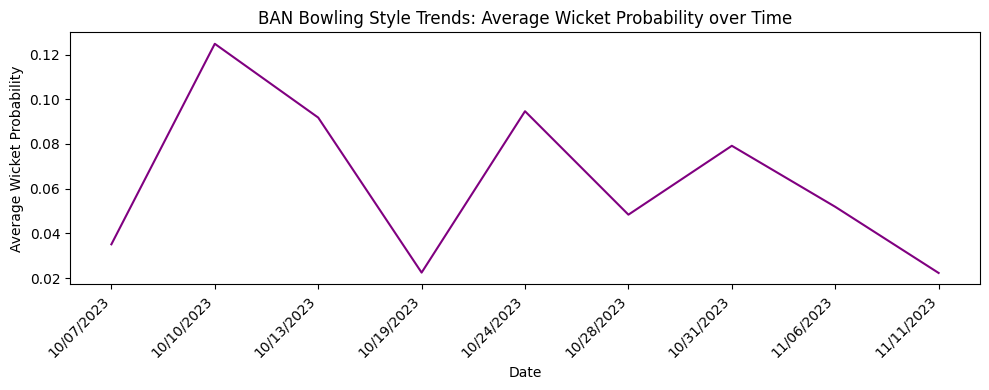

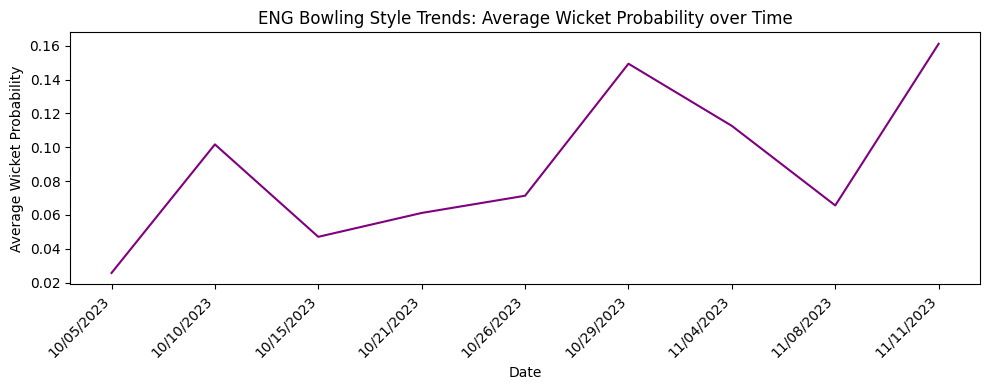

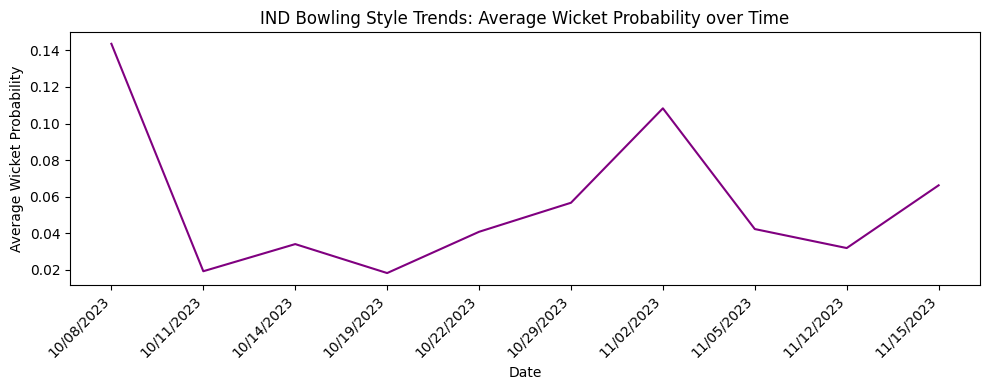

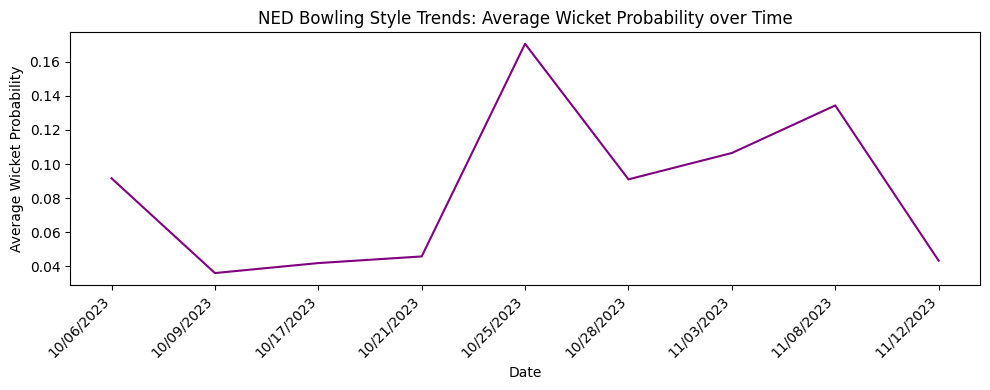

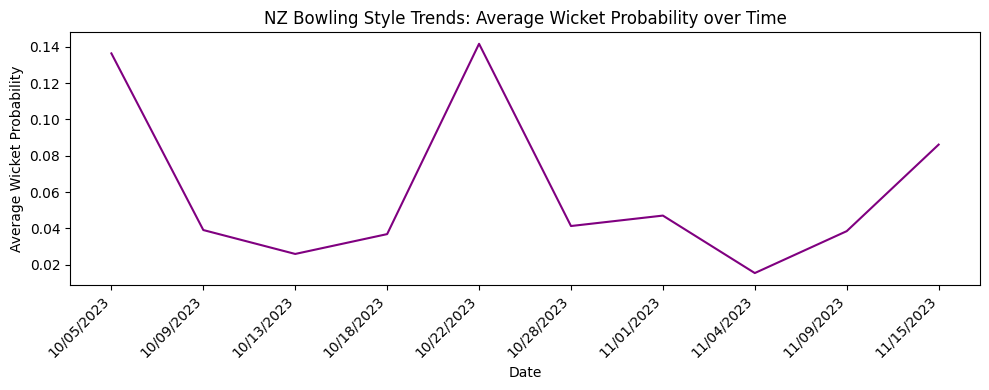

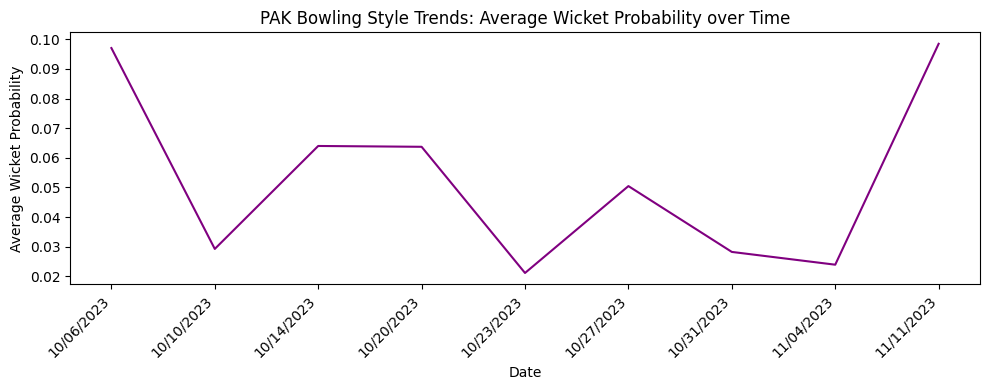

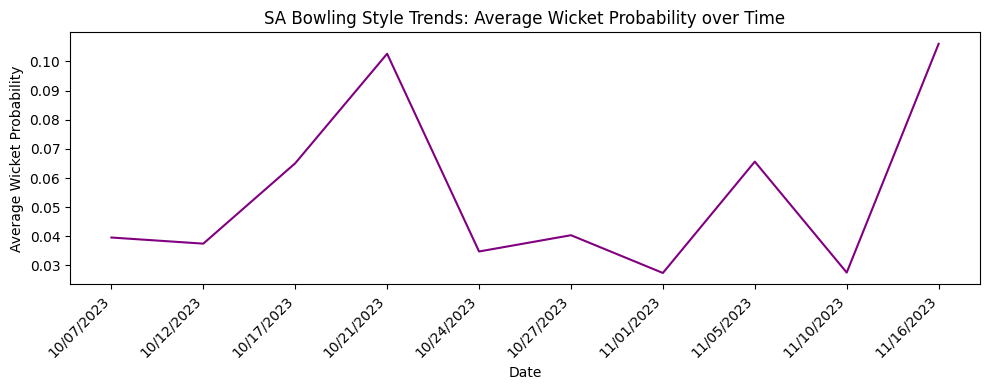

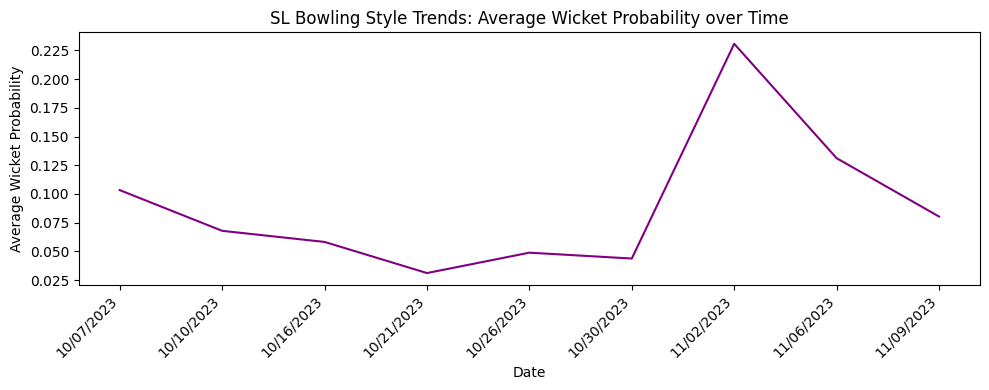

In [36]:
# Team-wise Bowling Style Trends: Average Wicket Probability over Time

# Get unique team names
unique_teams = team_temporal_performance['team'].unique()

# Plot bowling style trends for average wicket probability over time for each team
for team_name in unique_teams:
    # Filter the DataFrame for the current team
    team_temporal_performance_single = team_temporal_performance[team_temporal_performance['team'] == team_name]

    # Plot the bowling style trend of the current team in terms of average wicket probability over time
    plt.figure(figsize=(10, 4))
    sns.lineplot(x='start_date', y='wicketball_prob', data=team_temporal_performance_single, color='purple')
    plt.title(f'{team_name} Bowling Style Trends: Average Wicket Probability over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Wicket Probability')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


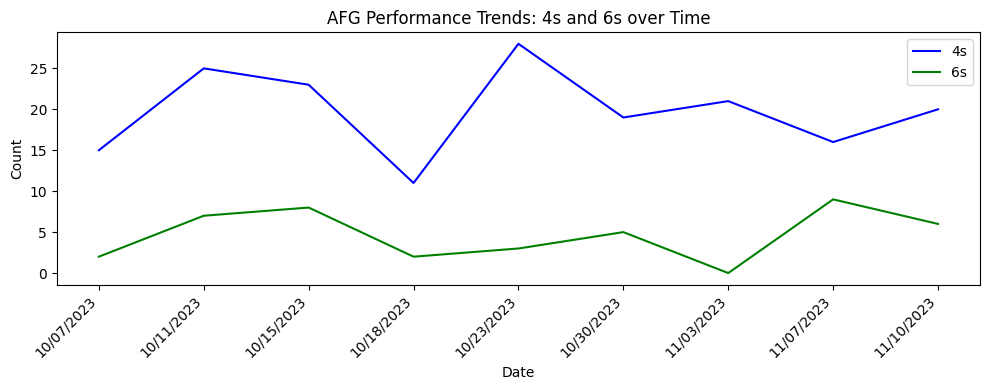

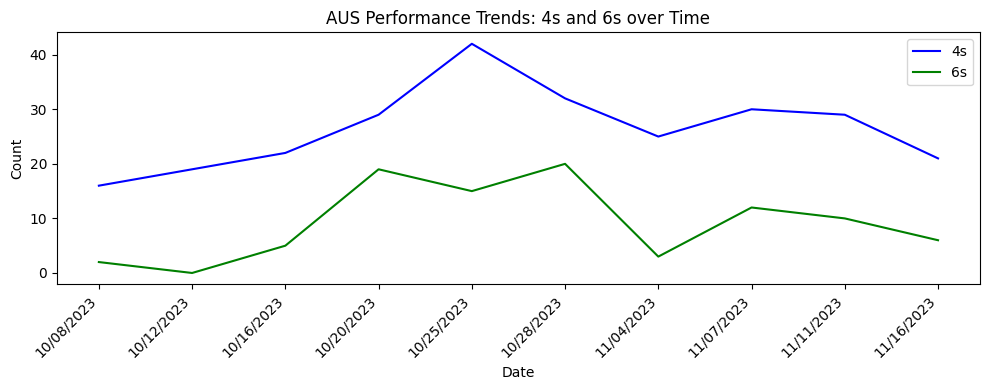

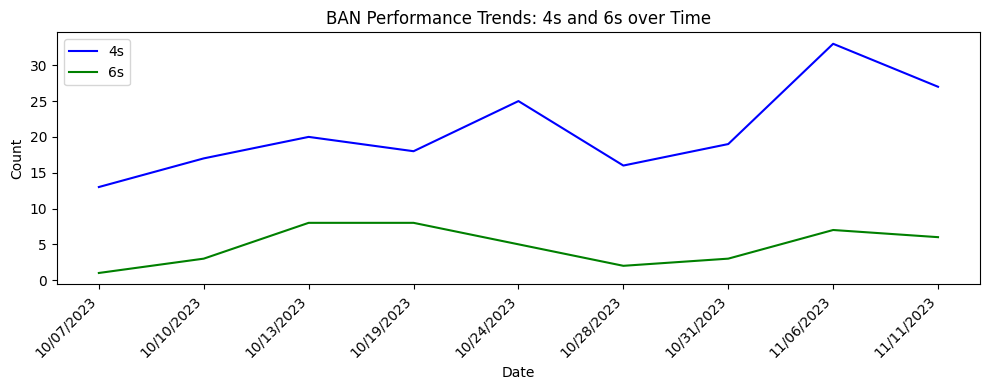

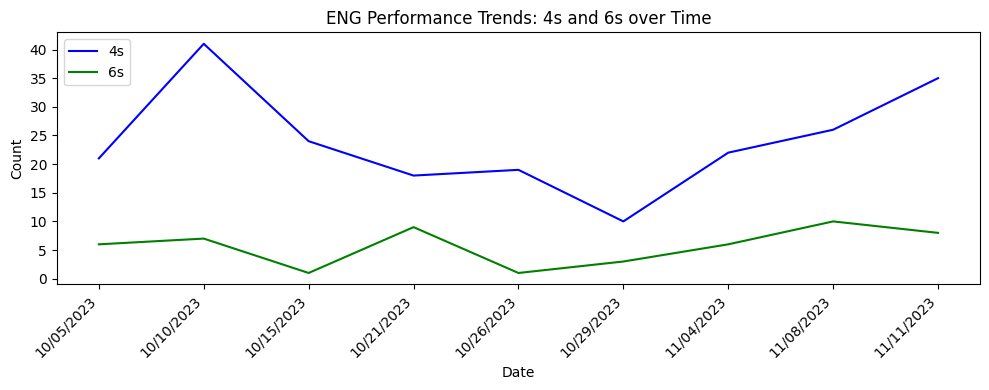

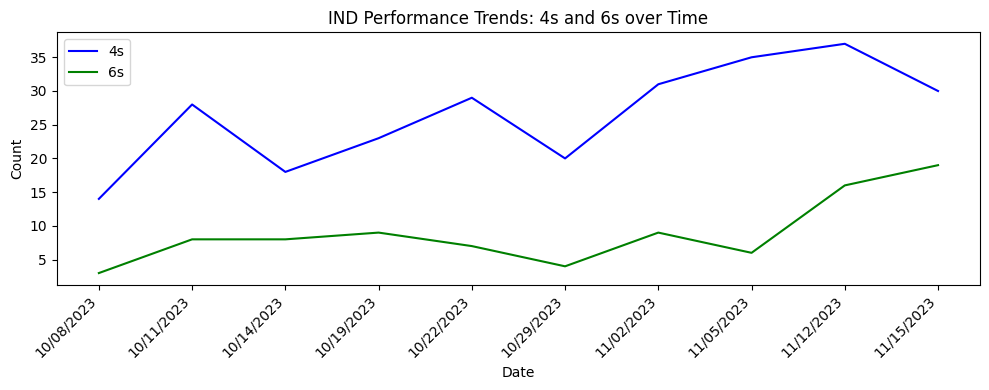

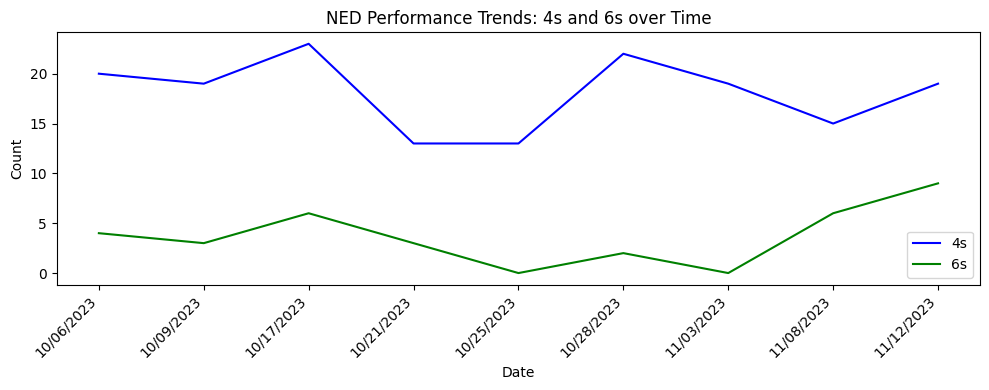

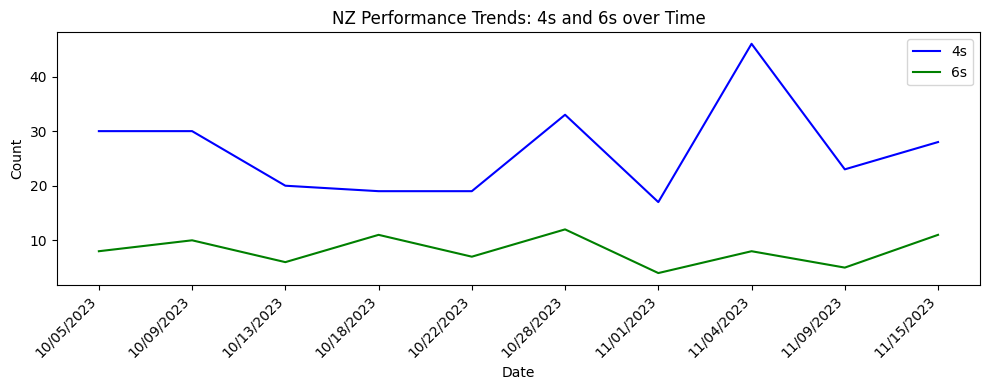

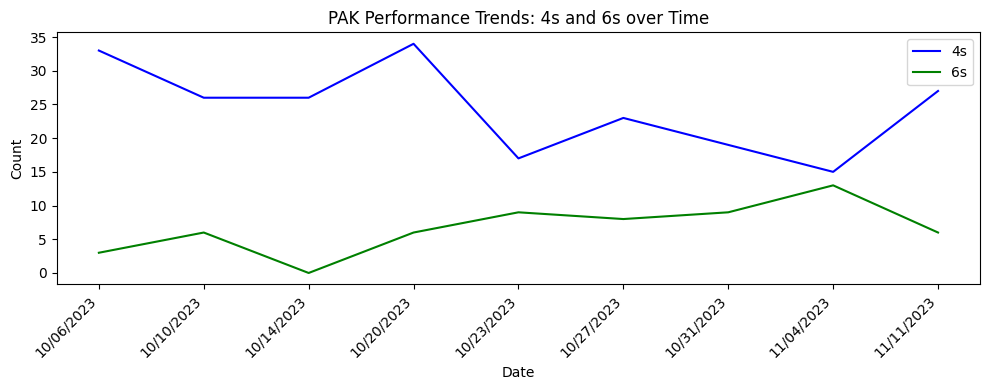

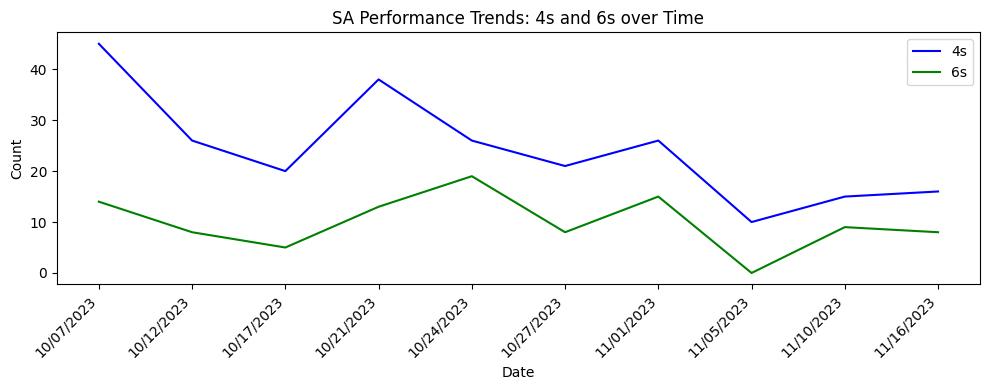

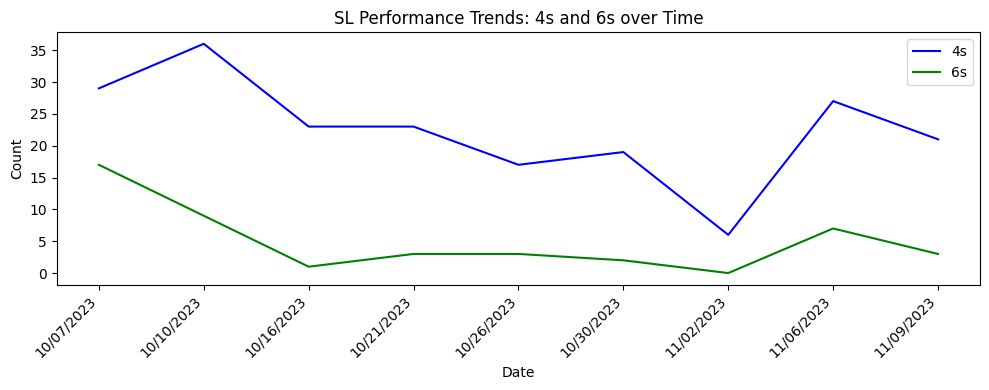

In [37]:
# Team-wise Performance Trends: 4s and 6s over Time

# Get unique team names
unique_teams = team_temporal_performance['team'].unique()

# Plot performance trends for 4s and 6s over time for each team
for team_name in unique_teams:
    # Filter the DataFrame for the current team
    team_temporal_performance_single = team_temporal_performance[team_temporal_performance['team'] == team_name]

    # Plot the performance trend of the current team in terms of 4s over time
    plt.figure(figsize=(10, 4))
    sns.lineplot(x='start_date', y='4s', data=team_temporal_performance_single, color='blue', label='4s')
    
    # Plot the performance trend of the current team in terms of 6s over time
    sns.lineplot(x='start_date', y='6s', data=team_temporal_performance_single, color='green', label='6s')
    
    plt.title(f'{team_name} Performance Trends: 4s and 6s over Time')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()
